Inspi: 

- https://www.kaggle.com/code/hasibalmuzdadid/brain-stroke-analysis-accuracy-96-03/notebook#Basic-Exploration
- https://www.kaggle.com/code/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy
- Emilies
- Exercise 3 fra BDM – tager udgangspunkt i brain stroke datasæt

# 1. Busines Understanding

### The business problem

The dataset used in this project is related to healthcare, as it contains data regarding stroke, which is is a critical life-threatening medical condition.

Stroke is according to the World Health Organization (WHO) the 2nd leading cause of death on a global plan. This accounts for approximately 11% of total deaths being caused by strokes. 

From both a societal and business perspective, it is relevant to address this problem. From a societal perspective, the health of patients can be improved. From a business perspective, it can redue costs related to hospitalization and treatment of hospitals. 

The dataset applied to this project is used to predict whether a patient is likely to encounter a stroke or not. The prediction is based on a variety of input parameters, which provides relevant information characterizing the individual patient. 


### Understanding of the context

Initially it is important to gather insights regarding the context of the problem we are scoping. 

- Information on brain strokes
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?resource=download

# 2. Data Understanding

Initially, we conduct an exploratory data analysis to get insights into the dataset.

### Importing libraries and packages

In [187]:
# Importing packages and libraries
import pandas as pd #Used
import numpy as np
import imblearn #Used
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE #Used
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV #Used
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier #Used
from sklearn.tree import plot_tree #Used
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix, classification_report #Used
from sklearn.neighbors import KNeighborsClassifier

: 

### Importing dataset

In [188]:
# Importing the csv file containing the dataset 
df = pd.read_csv('strokes.csv', sep=',')

### Attribute Information

To get insight to the dataset, we look at the attributes and their values.

The dataset has 12 attributes, where one of them is the target value (`stroke`)

- **id:** Unique identifier

- **gender:** Indicating the gender of the patient - "Male", "Female" or "Other"

- **age:** Age of the patient

- **hypertension:** 0 (the patient doesn't have hypertension), 1 (the patient has hypertension)

- **heart_disease:** 0  (the patient doesn't have any heart diseases), 1 (the patient has a heart disease)

- **ever_married:** Indicating if the patient has ever been married - "No" (the patient has not been married) "Yes"

- **work_type:** Indicating what type of work the patient has - "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

- **Residence_type:** Indicating the type of setting where the patient lives - "Rural" or "Urban"
    - *Rural:* Indicates that the location is generally out in the country, outside of cities, typically not densely populated.
    - *Urban:* Indicates that the location is in the city - a location that is densely populated.
    
- **avg_glucose_level:** average glucose level in blood

- **bmi:** Body Mass Index

- **smoking_status:** Indicates the smoking status of the patient - "formerly smoked", "never smoked", "smokes" or "Unknown"*
    - *Note:* "Unknown" in `smoking_status` means that the information is unavailable for this patient.

- **stroke:** The target value, indicating whether the patient has had a stroke or not - 1 (the patient had a stroke) or 0 (the patient hsa not had a stroke)

Reference: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


### Dataset insights

In [189]:
# Shape of the dataset - Number of rows and columns
df.shape

(5110, 12)

**Insights:**
- The dataset has 5110 rows and 12 columns (attributes)

In [190]:
# Display top 5 instances of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- The dataset contains 5110 instances with 11 features and 1 output variable 
- We will drop the **id**-column later on, as it doesn't affect the prediction of the target value.

In [191]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Insights:**
- The dataset contains both *numerical* and *categorical* variables
    - 5 numerical features: age, hypertension, heart_disease, avg_glucose_level, bmi, stroke
    - 4 categorical features: gender, ever_married, work_type, Residence_type, smoking_status
- The *categorical* features will need to be encoded to numerical values, which will be done later on.
- The *bmi*-column contains null-values, which we will look further into

In [192]:
# Analyze summary statistics - numeric columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [193]:
# Analyze summary statistics - categorical (object) columns
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### Duplicates

In [194]:
# Checking for duplicate values
df.duplicated().sum()

0

**Insights:**
- There is 0 duplciates among the total 5110 entries in the dataset

#### Null-values

In [195]:
# Checking for null values - amount and percentage of missing values for each attribute
def missing_values (df):
    number_missing = df.isnull().sum()
    percentage_missing = round(df.isnull().mean()*100,2)
    values_missing = pd.concat([number_missing, percentage_missing], axis=1, keys=['Missing Values (amount)', 'Missing Values (%)'])
    return values_missing

missing_values(df)

,Missing Values (amount),Missing Values (%)
id,0,0.00
gender,0,0.00
age,0,0.00
hypertension,0,0.00
heart_disease,0,0.00
ever_married,0,0.00
work_type,0,0.00
Residence_type,0,0.00
avg_glucose_level,0,0.00
bmi,201,3.93


**Insights:**
- There are 201 null-values in the *bmi*-column, meaning that there are missing values. This corresponds to approx. 4% missing values within the *bmi*-column.
- The rows with missing valus will be dropped later on.


### Target Variable

In [196]:
# We take a look at the values of the target variable (y)
y = df['stroke']

# Percentage and number of patients that had a stroke:
print(f'Percentage of patients that had a stroke: {round(y.value_counts(normalize=True)[1]*100,2)}% ({y.value_counts()[1]} patients) ')
      
# Percentage of patient that had a stroke:
print(f'Percentage of patients that did not have a stroke: {round(y.value_counts(normalize=True)[0]*100,2)}% ({y.value_counts()[0]} patients)')

Percentage of patients that had a stroke: 4.87% (249 patients) 
Percentage of patients that did not have a stroke: 95.13% (4861 patients)


**Insights:**
- Approx. 5% instances of the target variable is 1 (*stroke*) --> 249 of the patients did not have a stroke
- Approx. 95% instances of the target variable is 0 (*no stroke*) --> 4861 of the patients did have a stroke 


    --> This indicates that the dataset contains imbalanced data, as the target class labels are unequally distributed

Text(0.5, 1.0, 'Stroke')

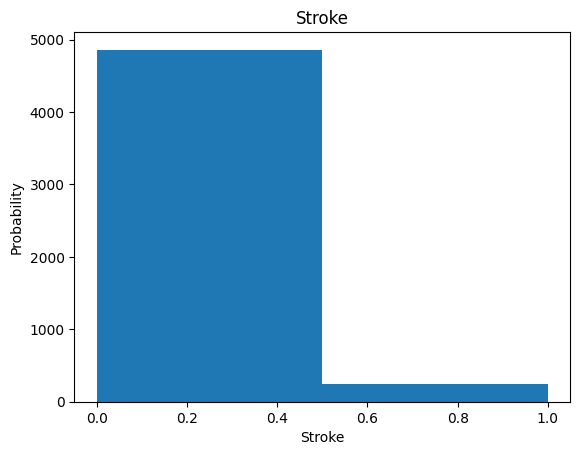

In [197]:


plt.hist(df['stroke'], bins=2)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Stroke');
plt.title('Stroke')

### Imbalanced Data
**Insights:**
- We see that instances across classes are imbalanced, which indicates that the dataset is imbalanced
- There are 19 times (4861/249) more patients that did not have stroke than patients that did have had a stroke. Thereby the non-stroke class dominates the stroke class.
    - Intermediate calculation: 4861+249=5110

- The stroke ratio is 0.05 (249/5110), which indicates an extreme degree of imbalance. 

    --> We will address imbalanced data later on

Reference: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

# 3. Data Preparation

#### Machine Learning Problem

- In this project we encounter a binary classification problem.
- The prediction is made on the `stroke`-attribute, which is the target variable.
- The purpose is to build a machine learning model, that provides the best prediction on the `stroke`-variable.

In [198]:
# Dropping "ID" column from dataframe
df = df.drop('id', axis='columns')

# Shape of dataset after dropping 'id'-attribute
print (f' The dataset contains {df.shape[0]} instances with {df.shape[1]-1} features and 1 output variable')

# Display top 5 instances of dataset
df.head()

 The dataset contains 5110 instances with 10 features and 1 output variable


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Drop null values

In [199]:
# Dropping null values from dataframe
df.dropna(axis = 0, inplace = True)
print (f' The shape of the dataset after dropping null values is {df.shape}')



 The shape of the dataset after dropping null values is (4909, 11)


#### Renaming attributes and values

In [200]:

df.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart_disease","ever_married":"Ever_married","work_type":"Work_type","avg_glucose_level": "Avg_glucose_level","bmi":"BMI","smoking_status":"Smoking_status","stroke":"Stroke"}, inplace = True)

df["Work_type"].replace({"Self-employed":"Self_employed","children":"Children", "Govt_job":"Government_job", "Private":"Private_job"}, inplace = True)
#df["smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True)

df = df[["Age","Gender","Ever_married","BMI","Work_type","Residence_type","Smoking_status","Hypertension","Heart_disease","Avg_glucose_level","Stroke"]]

df["Ever_married"].replace({"No":0, "Yes":1}, inplace = True)
print("After preprocessing, the data set looks as follows :")
df.head()

After preprocessing, the data set looks as follows :


,Age,Gender,Ever_married,BMI,Work_type,Residence_type,Smoking_status,Hypertension,Heart_disease,Avg_glucose_level,Stroke
0,67.0,Male,1,36.6,Private_job,Urban,formerly smoked,0,1,228.69,1
2,80.0,Male,1,32.5,Private_job,Rural,never smoked,0,1,105.92,1
3,49.0,Female,1,34.4,Private_job,Urban,smokes,0,0,171.23,1
4,79.0,Female,1,24.0,Self_employed,Rural,never smoked,1,0,174.12,1
5,81.0,Male,1,29.0,Private_job,Urban,formerly smoked,0,0,186.21,1


#### Encode categorical attributes to numerical

As identified under data understanding, there are attribtues in the dataset that need som preprossing.

We identified 4 categorical attributes that need to be encoded into numerical values. The multiple nominal variable are converted into multiple binary-valued features (0s and 1a) by applying the pandas get_dummies()-function. 

The categorical features are: gender, ever_married, work_type, Residence_type, smoking_status


In [218]:
# encode categorical attributes
encoded = pd.get_dummies(df)
df = encoded 
# https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn#label-encoding
# https://datagy.io/sklearn-one-hot-encode/


In [219]:
# Shifting the column with the target variable "Stroke" to the last column of dataframe to perform iloc
shift = df['Stroke'] 
df = df.drop('Stroke', axis = 1)
df = df.join(shift)

In [220]:
# Dataframe after pre-processing
df.head()

,Age,Ever_married,BMI,Hypertension,Heart_disease,Avg_glucose_level,Gender_Female,Gender_Male,Gender_Other,Work_type_Children,...,Work_type_Never_worked,Work_type_Private_job,Work_type_Self_employed,Residence_type_Rural,Residence_type_Urban,Smoking_status_Unknown,Smoking_status_formerly smoked,Smoking_status_never smoked,Smoking_status_smokes,Stroke
0,67.0,1,36.6,0,1,228.69,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
2,80.0,1,32.5,0,1,105.92,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
3,49.0,1,34.4,0,0,171.23,1,0,0,0,...,0,1,0,0,1,0,0,0,1,1
4,79.0,1,24.0,1,0,174.12,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1
5,81.0,1,29.0,0,0,186.21,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1


In [221]:
# Dataframe info after pre-processing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4909 non-null   float64
 1   Ever_married                    4909 non-null   int64  
 2   BMI                             4909 non-null   float64
 3   Hypertension                    4909 non-null   int64  
 4   Heart_disease                   4909 non-null   int64  
 5   Avg_glucose_level               4909 non-null   float64
 6   Gender_Female                   4909 non-null   uint8  
 7   Gender_Male                     4909 non-null   uint8  
 8   Gender_Other                    4909 non-null   uint8  
 9   Work_type_Children              4909 non-null   uint8  
 10  Work_type_Government_job        4909 non-null   uint8  
 11  Work_type_Never_worked          4909 non-null   uint8  
 12  Work_type_Private_job           49

In [ ]:
# Extracting the dataframe after pre-processing to csv file, creating a cleansed dataset 
#df.to_csv(r'cleansed_dataset.csv')

# 4. Modeling

## Selecting informative attributes

How do we select an attribute to partition data in an informative way? Segment the data into groups that are as pure as possible.
By pure we mean homogeneous with respect to the target variable.

Methods for selecting relevant features (lecture 3)
- Gini impurity
- Entropy
- Information gain
- DAG for visualizing causal inferences from observational data.


## Baseline model

In [223]:
# Selecting the relevant attributes and creating the features vector X and the target vector y.
y = df['Stroke']
X = df.iloc[:,:-1] # All rows, columns from 0 to second last (last column is target)


#y = df.iloc[:, -1].values # All rows, last column
#X = df.iloc[:, 1:-1].values # All rows, column 1 to second last (last column is target variable)
#https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/

In [224]:
# Calculating ZeroR baseline model for "Stroke" column
zeroR = y.value_counts()[df['Stroke'].min()]/(y.value_counts()[df['Stroke'].max()] + y.value_counts()[df['Stroke'].min()])
print(zeroR)

0.9574251375025463


## Data Modeling